In [1]:
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

(_,_), (X, y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


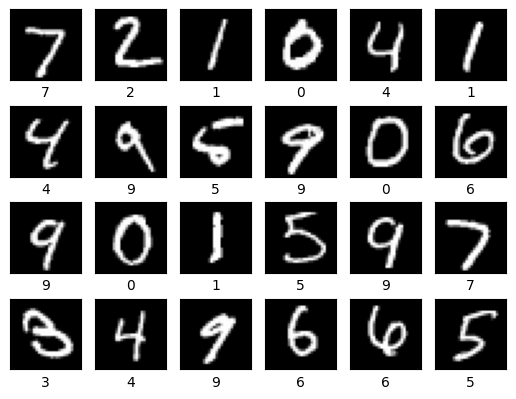

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

Введите .shape полученного набора данных

In [3]:
print(X.shape)

(10000, 28, 28)


При помощи train_test_split разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [4]:
from sklearn.model_selection import train_test_split

random_state = 21

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

Давайте, раз речь идет об известном наборе данных, заставим K-means искать  10  групп объектов.

«Распрямите» изображения и обучите алгоритм KMeans с параметрами, указанными в вашем задании.

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=random_state)
clusters = kmeans.fit_predict(X_train.reshape(-1, 784))

Определите чило элементов, отнесенных к кластеру, указанному в вашем задании

In [6]:
from collections import Counter
print(dict(Counter(clusters)))

{5: 876, 4: 674, 1: 685, 6: 1034, 3: 1182, 0: 433, 8: 738, 9: 571, 2: 621, 7: 1186}



Постройте изображения, соответствующие центроидам полученных кластеров. Для этого reshapeните координаты центроидов до размера  28×28  и постройте полученную матрицу, например, в черно-белых оттенках.

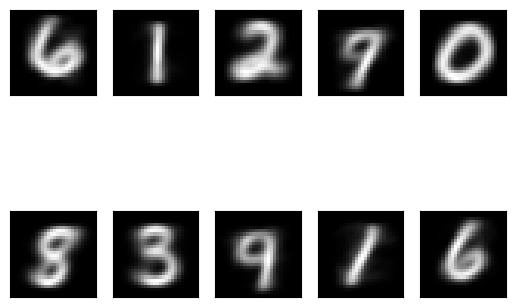

In [7]:
fig, ax = plt.subplots(2, 5)
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, cmap='gray')

Можно заметить, что получившиеся картинки весьма походят на рукописные цифры. Впрочем, кластеризация прошла не без накладок. Предположите, какие цифры могут быть перепутаны и каких не хватает.

Так как получившиеся кластеры ничего не знают о природе кластеризумых объектов, метки кластеров могут отличаться от «разумных меток». Восстановите правильные метки, используя следующие соображения: кластеру присваивается метка тех цифр, представителей которых в кластере большинство. Действительно ли это помогло восстановить справедливость?

In [8]:
# этот код не работает

from scipy.stats import mode
import numpy as np
corrected_clusters = np.zeros_like(clusters)
cluster_values = []
for i in range(10):
    mask = (clusters == i)
    corrected_clusters[mask] = mode(y_train[mask])[0]
    cluster_values.append(mode(y_train[mask])[0])

In [9]:
from scipy.stats import mode
import numpy as np

# Инициализация массивов
corrected_clusters = np.zeros_like(clusters)
cluster_values = []

for i in range(10):
    mask = (clusters == i)
    # Определение моды для текущего кластера, обработка как массива
    mode_result = mode(y_train[mask])[0]
    if isinstance(mode_result, np.ndarray):  # Проверка, что результат массив
        corrected_clusters[mask] = mode_result[0]
        cluster_values.append(mode_result[0])
    else:
        corrected_clusters[mask] = mode_result
        cluster_values.append(mode_result)

print(cluster_values)


[6, 1, 2, 7, 0, 8, 3, 9, 1, 6]


Введите полученные метки кластеров после преобразования и сравните с ранее построенными изображениями на основе центроидов. Подтверждаются ли ваши догадки фактами?

In [10]:
# print([x[0] for x in cluster_values])   # этот код не работает

IndexError: invalid index to scalar variable.

Разумно оценить что-то вроде точности. Считая, что все объекты кластера имеют ту же метку, что и сам кластер, сравните эти метки с истинными метками. Вычислите accuracy. Рекомендуем использовать функцию accuracy_score из библиотеки sklearn.

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, corrected_clusters))

0.59425


При помощи метода .predict() произведите кластеризацию тестовых данных. Переименуйте метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования.

In [ ]:
# КОД НЕ РАБОТАЕТ

clusters_test = kmeans.predict(X_test.reshape(-1, 784))
labels_test = np.zeros_like(clusters_test)
for i in range(10):
    mask = (clusters_test == i)
    labels_test[mask] = cluster_values[i][0]

Ошибка в строке labels_test[mask] = cluster_values[i][0] возникает из-за того, что cluster_values[i] — это скаляр (число), а не массив, и [0] к нему не применим. Поскольку мы уже скорректировали cluster_values, чтобы он содержал скаляры, можем использовать его напрямую.

In [11]:
clusters_test = kmeans.predict(X_test.reshape(-1, 784))
labels_test = np.zeros_like(clusters_test)

# Присвоение предсказанных меток на основе `cluster_values`
for i in range(10):
    mask = (clusters_test == i)
    labels_test[mask] = cluster_values[i]

print(labels_test)


[1 3 1 ... 6 1 9]


Постройте матрицу ошибок.

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels_test)
print(mat)

[[158   2   1  10   0   0  31   0   4   0]
 [  0 213   0   0   0   0   0   0   0   0]
 [  2  23 150  10   0   0   7   3   5   6]
 [  0  14  11 144   0   0   3   1  30   5]
 [  0  11   0   0   0   0  23  51   0  89]
 [  1  19   0  64   0   0   9  21  62  10]
 [  3   5   0   0   0   0 173   0   2   1]
 [  1  22   3   0   0   0   0 134   0  65]
 [  4  17   3  39   0   0   4  12 114   7]
 [  0   5   0   2   0   0   3  84   4 100]]


С какой цифрой построенная модель чаще всего путала цифру, указанную в вашем варианте?

In [20]:
import numpy as np

# Инициализируем переменные для хранения информации о максимальной путанице
most_confused_digit = None
confused_with_digit = None
max_confusion_count = 0

# Проходим по каждой строке матрицы ошибок
for i in range(len(mat)):
    # В каждой строке находим максимальное значение вне диагонали
    for j in range(len(mat)):
        if i != j and mat[i][j] > max_confusion_count:
            max_confusion_count = mat[i][j]
            most_confused_digit = i
            confused_with_digit = j

print(f"Цифра {most_confused_digit} чаще всего путается с цифрой {confused_with_digit}, количество путаниц: {max_confusion_count}")


Цифра 4 чаще всего путается с цифрой 9, количество путаниц: 89


In [19]:
# Определяем строку, которая соответствует цифре 4
row_for_4 = mat[4]

# Убираем диагональный элемент, чтобы найти наибольшее неверное предсказание
row_for_4_no_diag = np.delete(row_for_4, 4)  # удаляем элемент на диагонали

# Находим индекс наибольшего значения (оно и указывает на цифру, с которой 4 путали чаще всего)
confused_with_digit_4 = np.argmax(row_for_4_no_diag)
# Учитываем сдвиг из-за удаления диагонального элемента
confused_with_digit_4 = confused_with_digit_4 + (confused_with_digit_4 >= 4)

print(f"Цифра 4 чаще всего путается с цифрой {confused_with_digit_4}")


Цифра 4 чаще всего путается с цифрой 9


In [22]:
#   КОД С ОШИБКОЙ

pred_lbls = set([x[0] for x in cluster_values])
full_set = set(range(10))
missed_digit = list(full_set.difference(pred_lbls))[0]
print(missed_digit)
print(np.argmax(mat[missed_digit]))

IndexError: invalid index to scalar variable.


Ошибка IndexError: invalid index to scalar variable в коде возникает из-за того, что элементы в cluster_values являются скалярными значениями, а не массивами, и поэтому попытка использовать [0] для доступа к значению вызывает ошибку.

Попробуем исправить код так, чтобы использовать значения в cluster_values корректно:

In [18]:
# Определяем уникальные метки кластеров, которые модель предсказала
pred_lbls = set(cluster_values)  # `cluster_values` уже содержит скалярные значения

# Определяем полный набор меток, который должен включать все цифры от 0 до 9
full_set = set(range(10))

# Определяем, какая цифра отсутствует в предсказанных метках
missed_digit = list(full_set.difference(pred_lbls))[0]

# Выводим отсутствующую цифру
print("Отсутствующая цифра:", missed_digit)

# Находим, с какой цифрой чаще всего путают пропущенную цифру в матрице ошибок
most_confused_with = np.argmax(mat[missed_digit])
print("Чаще всего цифра", missed_digit, "путается с цифрой", most_confused_with)


Отсутствующая цифра: 4
Чаще всего цифра 4 путается с цифрой 9


Вычислите точность модели на тестовых данных.

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, labels_test))



0.593


Интересно отметить, что мы построили классификатор на основе кластеризации при том, что никакими «правильными ответами» мы не пользовались (разве что для оценки).

А сколько кластеров кажется оптимальным количеством, если использовать каменистую осыпь? Постройте график каменистой осыпи для числа кластеров от  7  до  16 . Можно ли уверенно определить оптимальное число кластеров?

  0%|          | 0/9 [00:00<?, ?it/s]

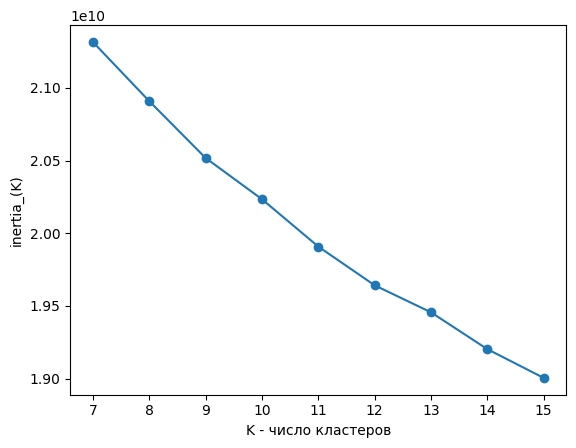

In [26]:
from tqdm.notebook import tqdm
n_c = range(7, 16)
inertia = [KMeans(n_clusters=k, random_state=random_state).fit(X_train.reshape(-1, 784)).inertia_ for k in tqdm(n_c)]

plt.plot(n_c, inertia, marker='o')
plt.xlabel('K - число кластеров')
plt.ylabel('inertia_(K)')
plt.show()

Все эти обучения черезчур уж долгие. Давайте сделаем «ход конем» и понизим размерность данных, пытаясь сохранять расстояния между объектами. Посмотрим, как это скажется на скорости и точности.

Преобразуйте тренировочный набор данных при помощи метода TSNE из библиотеки sklearn. Используйте параметры, указанные в вашем задании.

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', random_state=random_state)
projections = tsne.fit_transform(X_train.reshape(-1, 784))

Произведите кластеризацию полученного набора данных при помощи KMeans с параметрами, указанными в вашем задании. Аналогично проделанному раньше переназначьте метки кластеров на основе метки большинства объектов в рамках кластера. Оцените точность модели на тренировочных данных.

In [29]:
projections

array([[ 24.416096 ,  59.06691  ],
       [ 51.54526  ,  11.789405 ],
       [-40.607197 ,   5.060077 ],
       ...,
       [ 11.871173 ,  -7.021617 ],
       [ -5.1038294,  50.8151   ],
       [-50.472454 ,  39.537975 ]], dtype=float32)

In [36]:
kmeans = KMeans(n_clusters=10, random_state=random_state)
clusters = kmeans.fit_predict(projections)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask])[0]

print(accuracy_score(y_train, labels))

0.823375


In [32]:
clusters

array([2, 4, 9, ..., 7, 6, 9], dtype=int32)

<Axes: >

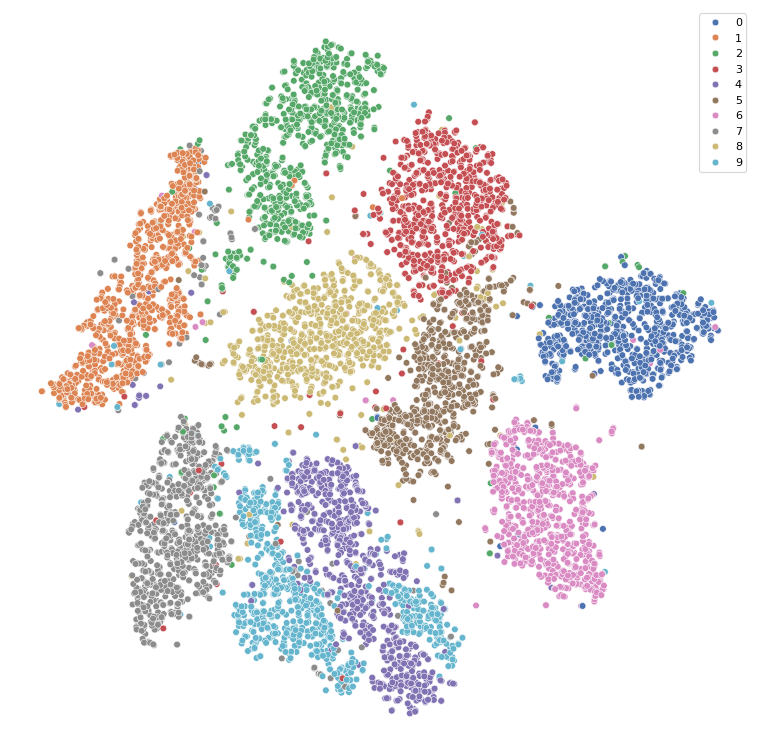

In [37]:
#
import seaborn as sns
#
from matplotlib.pyplot import figure

#
figure(figsize=(12, 12), dpi=80)
#
plt.axis("off")
#
sns.scatterplot(x=projections[:,0], y=projections[:,1], hue=y_train, palette="deep")

Загрузка данных:

Создаем пример данных projections с тремя признаками и метки классов y_train.

Создание трехмерного графика:

Используем fig.add_subplot(111, projection='3d') для создания трехмерного графика.

Отключение осей:

Используем ax.set_axis_off() для отключения осей.

Создание трехмерного scatterplot:

Используем ax.scatter для создания трехмерного scatterplot, указывая координаты x, y и z, а также цвета c на основе меток классов y_train.

Добавление легенды:

Используем ax.legend для добавления легенды, чтобы показать, какие цвета соответствуют каким классам.

Настройка графика:

Устанавливаем заголовок графика с помощью ax.set_title.

Отображение графика:

Используем plt.show() для отображения графика.

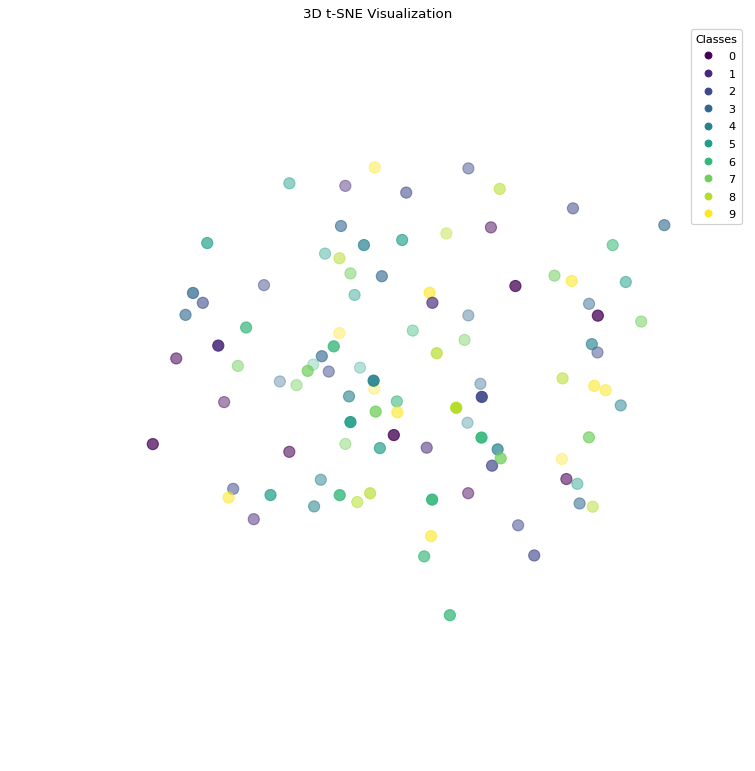

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Пример данных
projections = np.random.rand(100, 3)  # 100 примеров с 3 признаками
y_train = np.random.randint(0, 10, 100)  # Метки классов

# Создание трехмерного графика
fig = plt.figure(figsize=(12, 12), dpi=80)
ax = fig.add_subplot(111, projection='3d')

# Отключение осей
ax.set_axis_off()

# Создание трехмерного scatterplot
scatter = ax.scatter(projections[:, 0], projections[:, 1], projections[:, 2],
                     c=y_train, cmap='viridis', s=100)

# Добавление легенды
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

# Настройка графика
ax.set_title('3D t-SNE Visualization')

# Отображение графика
plt.show()